In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures

import seaborn as sns
## here are some settings 
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':300}) #defining dpi setting

sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
import timeit #imports timeit module
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
start_time = timeit.default_timer() #defines start time so computational time can be calculated
print("Hello World")
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

Hello World
---Run time is 0.00019249999991188815 seconds ---



In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

import statistics
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm
import wfdb
import numpy as np
import pandas as pd

In [4]:
# import os
# cwd = os.getcwd()
# print(cwd)
# os.chdir('/Users/chenc/000---STT450-Jupyter Notebook/000--STT450-550/') 
#data = load_breast_cancer(as_frame = True); 
#df = data.frame; 
#print(df.shape)
# In this block use the code we looked at on 6/30 as a reference to save our rr-intervals as a .
rlist = []
records = 'mit-bih-raw\RECORDS' # Replace the _______ with the name of the records file in your MIT-BIH data folder
with open(records) as rfile: #Then we open the file 
                             #The 'with' command only opens the file while we are in it. Automatically closes the file when we're not
    for record in rfile:  # Then we iterate through the lines in the file
        record = record[0:len(record)-1] # Remove any erronious new line characters at the end ('\n')
        rlist.append(record) # Then build an array with it
        

###### Step 1: Initialize all Arrays
             # Below, replace all of the ___ with the command that declares an array/list
             # hint: https://stackoverflow.com/questions/1514553/how-to-declare-an-array-in-python
samples = [] # will house the samples of all subjects
good_list = [] # will list the names of the subjects we successfully extracted
bad_list = [] # will house the names of the subjects we failed to extract
qrs = [] # will house the indices of R-Peaks for all subjects
atr_label = [] # will house the labels for each rhythm annotation for all subjects
atr_locs = [] # will house the locations corresponding to the rhythm annotation labels


###### Step 2: Extract Information
for x in tqdm(rlist): #this will iterate through te records that we found above
  
    try: # A try statement will run the except statement if for some reason the try commands fail
         # In this case I use the try statement because one of the subjects has no signal data causing failure
         # I then use bad_list and good_list so that all of the indices in rlist match with the arrays we initialized in Step 1, above
        ######################################################
            # Below find the wfdb function that will return the information that is described below 
        # Then replace _____ with the correct function call
        samp = wfdb.rdsamp('mit-bih-raw/'+x) # wfdb._____(file_location) will read the signal & header data and return a 2 value array
            # samp[0] - the signal data is the raw reading from the ecg. Each value is a sample taken.
            # samp[1] - the header data includes things about the signal data such as:
              # samples per section, denoted 'fs'
              # number of signals, denoted 'n_sig'
            
        ######################################################
        samples.append(samp) #add it to our array for all subject
            #What is our file extension that has the annotation we want? Find it here and replace _____ with it 
            #hint: READ THE VARIABLE NAMES!!!!
        qrs_tmp = wfdb.rdann('mit-bih-raw/'+x, extension='qrs') #extract the QRS Info
        qrs_locs = np.array(qrs_tmp.sample, dtype='int') #Get just the loccation of R-Peaks from the QRS Info
        qrs.append(qrs_locs) # Add to our array for all subjects
        
            #Do the same thing here
        atr = wfdb.rdann('mit-bih-raw/'+x,extension='atr') #extract the atr info which stores the rhythm type(s) over the whole signal
        atr_label.append(atr.aux_note) # aux_note stores the type of rhythm - main two are '(N' for normal and '(AFIB' for AFIB
        atr_locs.append(np.append(atr.sample, len(samp[0]))) #I add the length of the whole sample to the end for better visualization later
        
        good_list.append(x) # when all extraction is successful append the record name to good_list
    except Exception as exep:
        print(exep) # Alert the user of an exception
        bad_list.append(x) # add to the bad list

        

  0%|          | 0/25 [00:00<?, ?it/s]

sampto must be greater than sampfrom
sampto must be greater than sampfrom


100%|██████████| 25/25 [00:25<00:00,  1.04s/it]


In [5]:
# df3 = pd.read_csv('Data/Carseats.csv')
# #df3.info()
# print(); df3.head(5)
features_df_list = []
for subject in good_list:
    data = pd.read_csv(f'subject-features-dataframes/subject{subject}.csv')
    data = data.assign(Subject = subject)
    #print(data)
    features_df_list.append(data)
features_maindf = pd.concat(features_df_list, ignore_index = True)

In [6]:
# df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
# df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]
# df3.Urban = df3.Urban.map({'No':0, 'Yes':1})
# df3.US = df3.US.map({'No':0, 'Yes':1})
# #df3.info()
# print(); df3.head(5)
#X = df3.drop(['Sales', 'High'], axis = 1)
#y = df3.High
##print(X.shape)
#print(y.shape)

In [7]:
x_values = ['SampEn','CosEn','RangeEn', 'FuzzyEn',
       'EntropyAF', 'PermEn', 'BubbleEn', 'MultiscaleEn', 'Volatility',]
y_values = ['Rhythm']

features_df_list[0]

,Unnamed: 0,AppEn,SampEn,CosEn,RangeEn,FuzzyEn,EntropyAF,PermEn,BubbleEn,MultiscaleEn,Volatility,Rhythm,Subject
0,0,0.807078,1.004927,-0.609038,24.173913,0.104346,0.264408,2.689178,1.354979,100.000000,0.024543,0,04015
1,1,0.722627,0.867501,-0.746464,24.086957,0.101648,0.161243,2.539367,1.151478,0.734993,0.034714,0,04015
2,2,0.780945,0.871395,-0.742570,23.565217,0.104487,0.089117,2.902002,1.690498,1.045270,0.033321,0,04015
3,3,0.551398,0.559616,-1.054349,24.000000,0.119426,0.126149,2.712962,1.446250,100.000000,0.019996,0,04015
4,4,0.638499,0.850539,-0.763426,23.304348,0.087503,1.000024,2.437125,1.319674,1.168238,0.033423,0,04015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,1743,0.000000,0.083382,-1.530583,20.695652,0.085013,-0.145519,2.689178,1.333665,0.239713,0.000326,0,04015
1744,1744,0.000000,0.083382,-1.530583,22.260870,0.086708,0.154363,2.326543,0.914422,0.239713,0.000604,0,04015
1745,1745,0.000000,0.083382,-1.530583,21.217391,0.086220,-0.649682,2.752192,1.474367,0.239713,0.000486,0,04015
1746,1746,0.000000,0.083382,-1.530583,21.739130,0.085932,-0.224733,2.200516,1.001454,0.239713,0.000595,0,04015


### Gradient Boosting for classification

In [9]:
crossvalidation = KFold(n_splits=23)
#for df in features_df_list:
df = features_maindf
acc_score = [];
Truth = [];
Output = [];
n_estimators_list = []
max_depth_list = []
#confusion_matrix_df = pd.DataFrame(columns=['TN', 'FP', 'FN', 'TP'])
for idx, subject in tqdm(enumerate(good_list)):
    
    train_index = ~df['Subject'].str.contains(subject)
    test_index = df['Subject'].str.contains(subject)
    X_train , X_test = df.loc[train_index,x_values], df.loc[test_index,x_values]
    y_train , y_test = df.loc[train_index,y_values].values.ravel(), df.loc[test_index,y_values]

    temp_model = GradientBoostingClassifier(learning_rate = 0.1,  
                                           random_state = 2)    
    param_distributions = {'n_estimators': randint(80,120), 'max_depth': randint(5,15)}

    search = RandomizedSearchCV(estimator=temp_model, param_distributions=param_distributions, random_state=0)
    search.fit(X_train, y_train)

    n_estimators_list.append(search.best_params_['n_estimators'])
    max_depth_list.append(search.best_params_['max_depth'])    

    model =  GradientBoostingClassifier(n_estimators=search.best_params_['n_estimators'], learning_rate=0.1, max_depth=search.best_params_['max_depth'], random_state = 2)
    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    #confusion_matrix_df.loc[idx] = confusion_matrix(Truth, Output).ravel()
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
try: 
    print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
except: 
    print('hi')
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print(acc_score)
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
temp_list = []
temp_idx = []
n_estimators_best = []
max_depth_best = []
for acc in acc_score:
    if acc >= 0.95:
        temp_list.append(acc)
        temp_idx.append(acc_score.index(acc))
for idx in temp_idx:
    n_estimators_best.append(n_estimators_list[idx])
    max_depth_best.append(max_depth_list[idx])


1it [17:25, 1045.75s/it]


KeyboardInterrupt: 

In [13]:
n_estimators_best

[475, 499, 511, 499, 496, 475, 481, 478, 496, 496, 478, 484, 499, 522, 476]

In [9]:
crossvalidation = KFold(n_splits=23)
#for df in features_df_list:
df = features_maindf
acc_score = [];
Truth = [];
Output = [];
# n_estimators_list = []
# max_depth_list = []
import statistics
mode_estimators = statistics.mode(n_estimators_best)
mode_depth = statistics.mode(max_depth_best)
#confusion_matrix_df = pd.DataFrame(columns=['TN', 'FP', 'FN', 'TP'])
for idx, subject in tqdm(enumerate(good_list)):
    
    train_index = ~df['Subject'].str.contains(subject)
    test_index = df['Subject'].str.contains(subject)
    X_train , X_test = df.loc[train_index,x_values], df.loc[test_index,x_values]
    y_train , y_test = df.loc[train_index,y_values].values.ravel(), df.loc[test_index,y_values]

#     temp_model = GradientBoostingClassifier(n_estimators = 500, 
#                                            learning_rate = 0.1, 
#                                            max_depth = 4, 
#                                            random_state = 2)    
#     param_distributions = {'n_estimators': randint(475,526), 'max_depth': randint(7,9)}

#     search = RandomizedSearchCV(estimator=temp_model, param_distributions=param_distributions, random_state=0)
#     search.fit(X_train, y_train)

#     n_estimators_list.append(search.best_params_['n_estimators'])
#     max_depth_list.append(search.best_params_['max_depth'])    

    model =  GradientBoostingClassifier(n_estimators=mode_estimators, learning_rate=0.1, max_depth=mode_depth, random_state = 2)
    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    #confusion_matrix_df.loc[idx] = confusion_matrix(Truth, Output).ravel()
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
try: 
    print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
except: 
    print('hi')
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print(acc_score)
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
# temp_list = []
# temp_idx = []
# n_estimators_best = []
# max_depth_best = []
# for acc in acc_score:
#     if acc >= 0.95:
#         temp_list.append(acc)
#         temp_idx.append(acc_score.index(acc))
# for idx in temp_idx:
#     n_estimators_best.append(n_estimators_list[idx])
#     max_depth_best.append(max_depth_list[idx])


23it [18:39:44, 2921.05s/it]

---Run time is 134503.8417012 seconds ---

Accuracy of each fold: 
 [0.9176201372997712, 0.9533468559837728, 0.9955919395465995, 0.9268585131894485, 0.9968652037617555, 0.9606490872210953, 0.7720691265763662, 0.9965963240299524, 0.9387550200803213, 0.9674751929437707, 0.9795825771324864, 0.9892318736539842, 0.8430839002267574, 0.9522292993630573, 0.6373855120732723, 0.9880372175454143, 0.9869773817683345, 0.9849971148297749, 0.7599323753169906, 0.9466739967014843, 0.9940119760479041, 0.9968612680477087, 0.9961945031712474]

Avg accuracy : 
0.9339576694135334

Std of accuracy : 
0.09144910721382804
[0.9176201372997712, 0.9533468559837728, 0.9955919395465995, 0.9268585131894485, 0.9968652037617555, 0.9606490872210953, 0.7720691265763662, 0.9965963240299524, 0.9387550200803213, 0.9674751929437707, 0.9795825771324864, 0.9892318736539842, 0.8430839002267574, 0.9522292993630573, 0.6373855120732723, 0.9880372175454143, 0.9869773817683345, 0.9849971148297749, 0.7599323753169906, 0.946673996701

In [10]:
mode_depth

8

In [11]:
mode_estimators

499

# All

In [8]:
crossvalidation = KFold(n_splits=23)
#for df in features_df_list:
df = features_maindf
acc_score = [];
Truth = [];
Output = [];
# n_estimators_list = []
# max_depth_list = []
import statistics
mode_estimators = 499
mode_depth = 8
#confusion_matrix_df = pd.DataFrame(columns=['TN', 'FP', 'FN', 'TP'])

from sklearn.inspection import permutation_importance
x_values = ['AppEn','SampEn','RangeEn', 'FuzzyEn',
       'EntropyAF', 'PermEn', 'BubbleEn', 'MultiscaleEn', 'Volatility',]
y_values = ['Rhythm']
#for df in features_df_list:

zero_values_list = [0] * len(x_values)

perm_imp_dict = dict(zip(x_values,zero_values_list))

# Initialize dataframe with zeros
average_importance = pd.DataFrame({'Importance':np.zeros(len(x_values))}, 
                                  index = x_values)

counts = pd.DataFrame({'Count':np.zeros(len(x_values))}, 
                                  index = x_values)


for idx, subject in tqdm(enumerate(good_list)):
    
    train_index = ~df['Subject'].str.contains(subject)
    test_index = df['Subject'].str.contains(subject)
    X_train , X_test = df.loc[train_index,x_values], df.loc[test_index,x_values]
    y_train , y_test = df.loc[train_index,y_values].values.ravel(), df.loc[test_index,y_values]

#     temp_model = GradientBoostingClassifier(n_estimators = 500, 
#                                            learning_rate = 0.1, 
#                                            max_depth = 4, 
#                                            random_state = 2)    
#     param_distributions = {'n_estimators': randint(475,526), 'max_depth': randint(7,9)}

#     search = RandomizedSearchCV(estimator=temp_model, param_distributions=param_distributions, random_state=0)
#     search.fit(X_train, y_train)

#     n_estimators_list.append(search.best_params_['n_estimators'])
#     max_depth_list.append(search.best_params_['max_depth'])    

    model =  GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state = 2)
    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    #confusion_matrix_df.loc[idx] = confusion_matrix(Truth, Output).ravel()
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
    
    
    temp_importance = pd.DataFrame({'Importance':model.feature_importances_*100}, 
                          index = X_train.columns)
    for feature in X_train.columns:
        average_importance.loc[feature, 'Importance'] += temp_importance.loc[feature, 'Importance']
        counts.loc[feature, 'Count'] += 1
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

    for i in range(0,len(x_values)):
        perm_imp_dict[x_values[i]] += result.importances_mean[i]*100

    
    
    
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
try: 
    print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
except: 
    print('hi')
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print(acc_score)
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
# temp_list = []
# temp_idx = []
# n_estimators_best = []
# max_depth_best = []
# for acc in acc_score:
#     if acc >= 0.95:
#         temp_list.append(acc)
#         temp_idx.append(acc_score.index(acc))
# for idx in temp_idx:
#     n_estimators_best.append(n_estimators_list[idx])
#     max_depth_best.append(max_depth_list[idx])

for i in range(0,len(x_values)):
    perm_imp_dict[x_values[i]] = perm_imp_dict[x_values[i]] / 23

perm_imp_dict["Gradboost"] = 100
perm_imp_df = pd.DataFrame([perm_imp_dict])

perm_imp_df_t = perm_imp_df.T
perm_imp_df_t.columns = ["Importance"]
perm_imp_df_t.sort_values(by=['Importance'],ascending=False)

#perm_imp_df_t.to_csv('perm_imp.csv',mode='a',header=False)

perm_imp_df_t = perm_imp_df_t.drop(["Gradboost"])


23it [04:46, 12.47s/it]

---Run time is 330.8978535000001 seconds ---

Accuracy of each fold: 
 [0.9210526315789473, 0.9634888438133874, 0.9955919395465995, 0.8273381294964028, 0.9895506792058516, 0.9679513184584179, 0.7529191966370855, 0.9959155888359428, 0.9352409638554217, 0.9691289966923925, 0.9823049001814882, 0.9849246231155779, 0.7891156462585034, 0.9751592356687898, 0.8026644462947544, 0.9689853788214444, 0.995887594242632, 0.9971148297749567, 0.9129332206255283, 0.9807586586036283, 0.9923011120615911, 0.9887005649717514, 0.9906976744186047]

Avg accuracy : 
0.9425967901373783

Std of accuracy : 
0.07305164051312414
[0.9210526315789473, 0.9634888438133874, 0.9955919395465995, 0.8273381294964028, 0.9895506792058516, 0.9679513184584179, 0.7529191966370855, 0.9959155888359428, 0.9352409638554217, 0.9691289966923925, 0.9823049001814882, 0.9849246231155779, 0.7891156462585034, 0.9751592356687898, 0.8026644462947544, 0.9689853788214444, 0.995887594242632, 0.9971148297749567, 0.9129332206255283, 0.98075865860

In [31]:
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
print(acc_score)
print(elapsed)

confusion_matrix = pd.DataFrame(confusion_matrix(Truth, Output))
acc_score1 = pd.DataFrame([acc_score])

confusion_matrix.to_csv("model_results/Gradboost_cm.csv",index=False)
acc_score1 = pd.DataFrame([acc_score])
acc_score1 = acc_score1.T
acc_score1.columns = ["Accuracy"]
acc_score1.to_csv("model_results/Gradboost_accuracy.csv",index=False)


[[23307  1436]
 [ 1332 18893]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     24743
           1       0.93      0.93      0.93     20225

    accuracy                           0.94     44968
   macro avg       0.94      0.94      0.94     44968
weighted avg       0.94      0.94      0.94     44968

[0.9216247139588101, 0.9622718052738337, 0.9955919395465995, 0.8279376498800959, 0.9890282131661442, 0.9683569979716025, 0.7529191966370855, 0.9959155888359428, 0.9357429718875502, 0.9691289966923925, 0.9823049001814882, 0.9856424982053122, 0.7891156462585034, 0.9738853503184713, 0.8018318068276437, 0.9689853788214444, 0.9945167923235092, 0.9971148297749567, 0.9133558748943365, 0.9807586586036283, 0.9927288280581694, 0.9887005649717514, 0.9885835095137421]
326.08995660000073


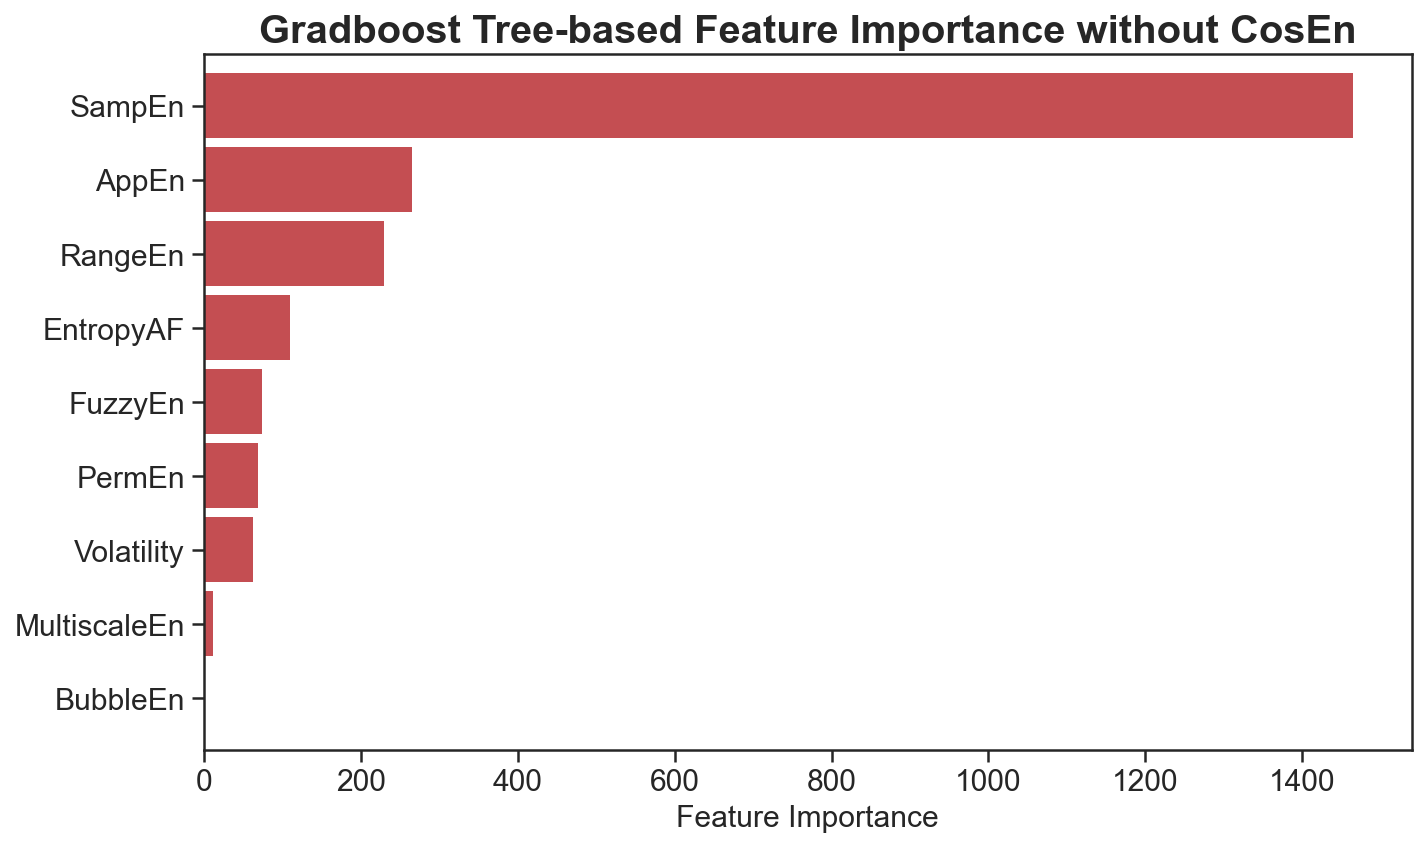

In [9]:
import matplotlib as mpl
df61 = average_importance.sort_values(by='Importance', axis=0, ascending=True)

mpl.rcParams['font.family'] = 'Arial'

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot
df61.plot(kind='barh', color='r', ax=ax, legend=False,width=0.9)

# Set axes labels and title
ax.set_xlabel("Feature Importance", fontsize=15)
ax.set_title("Gradboost Tree-based Feature Importance without CosEn", fontsize=20, weight='bold')

# Make the axes labels bigger
ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()


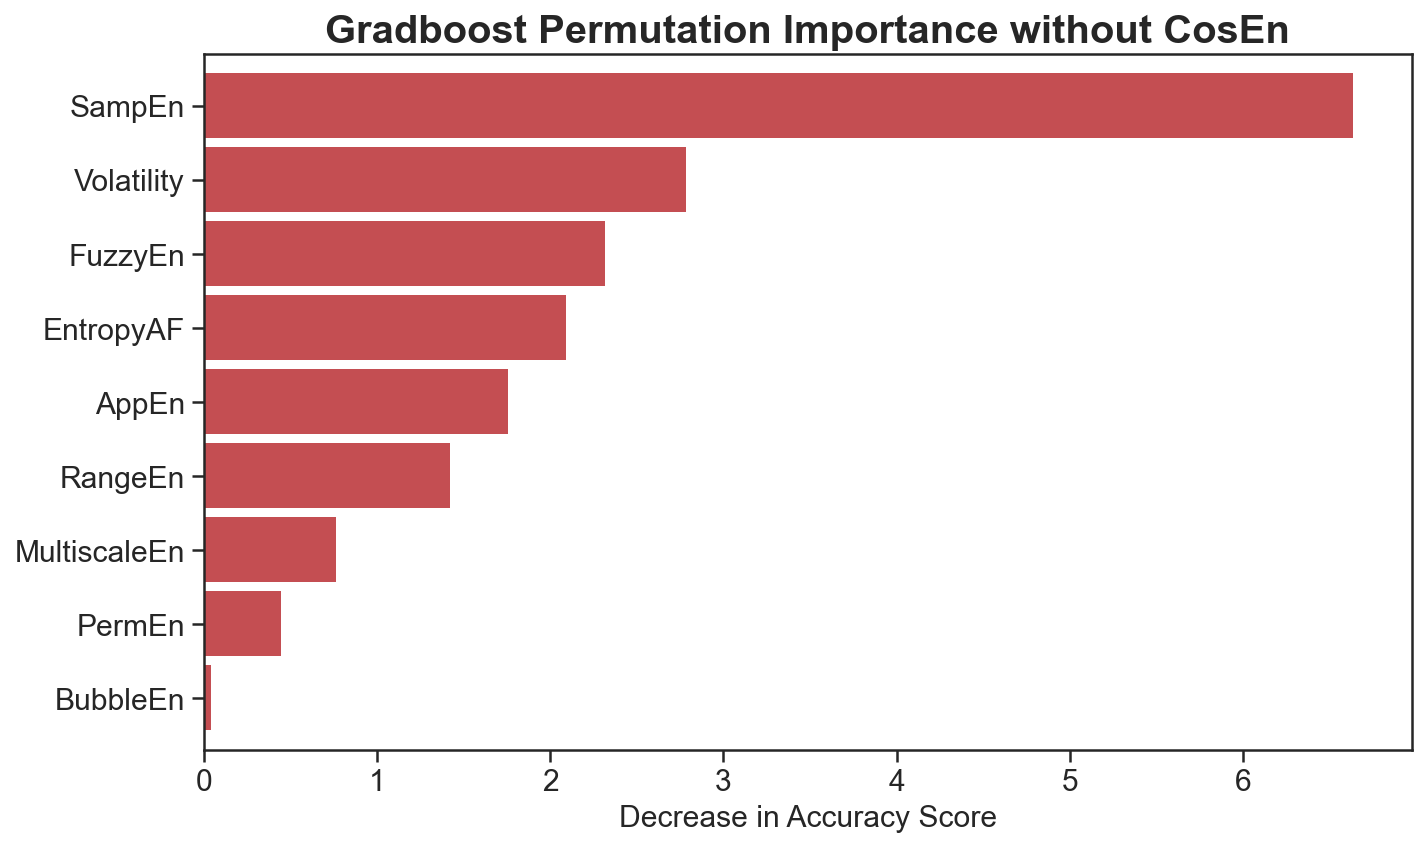

In [10]:
import matplotlib as mpl

# perm_imp_df = pd.DataFrame([perm_imp_dict])

# perm_imp_df_t = perm_imp_df.T
# perm_imp_df_t.columns = ["Importance"]
# perm_imp_df_t.sort_values(by=['Importance'],ascending=False)


df62 = perm_imp_df_t.sort_values(by='Importance', axis=0, ascending=True)

mpl.rcParams['font.family'] = 'Arial'

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot
df62.plot(kind='barh', color='r', ax=ax, legend=False,width=0.9)

# Set axes labels and title
ax.set_xlabel("Decrease in Accuracy Score", fontsize=15)
ax.set_title("Gradboost Permutation Importance without CosEn", fontsize=20, weight='bold')

# Make the axes labels bigger
ax.tick_params(axis='both', which='major', labelsize=15)

plt.xlim(0)
plt.tight_layout()
plt.show()


# No SampEn

In [35]:
crossvalidation = KFold(n_splits=23)
#for df in features_df_list:
df = features_maindf
acc_score = [];
Truth = [];
Output = [];
# n_estimators_list = []
# max_depth_list = []
import statistics
mode_estimators = 499
mode_depth = 8
#confusion_matrix_df = pd.DataFrame(columns=['TN', 'FP', 'FN', 'TP'])

from sklearn.inspection import permutation_importance
x_values = ['AppEn','CosEn','RangeEn', 'FuzzyEn',
       'EntropyAF', 'PermEn', 'BubbleEn', 'MultiscaleEn', 'Volatility',]
y_values = ['Rhythm']
#for df in features_df_list:

zero_values_list = [0] * len(x_values)

perm_imp_dict = dict(zip(x_values,zero_values_list))

# Initialize dataframe with zeros
average_importance = pd.DataFrame({'Importance':np.zeros(len(x_values))}, 
                                  index = x_values)

counts = pd.DataFrame({'Count':np.zeros(len(x_values))}, 
                                  index = x_values)


for idx, subject in tqdm(enumerate(good_list)):
    
    train_index = ~df['Subject'].str.contains(subject)
    test_index = df['Subject'].str.contains(subject)
    X_train , X_test = df.loc[train_index,x_values], df.loc[test_index,x_values]
    y_train , y_test = df.loc[train_index,y_values].values.ravel(), df.loc[test_index,y_values]

#     temp_model = GradientBoostingClassifier(n_estimators = 500, 
#                                            learning_rate = 0.1, 
#                                            max_depth = 4, 
#                                            random_state = 2)    
#     param_distributions = {'n_estimators': randint(475,526), 'max_depth': randint(7,9)}

#     search = RandomizedSearchCV(estimator=temp_model, param_distributions=param_distributions, random_state=0)
#     search.fit(X_train, y_train)

#     n_estimators_list.append(search.best_params_['n_estimators'])
#     max_depth_list.append(search.best_params_['max_depth'])    

    model =  GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state = 2)
    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    #confusion_matrix_df.loc[idx] = confusion_matrix(Truth, Output).ravel()
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
    
    
    temp_importance = pd.DataFrame({'Importance':model.feature_importances_*100}, 
                          index = X_train.columns)
    for feature in X_train.columns:
        average_importance.loc[feature, 'Importance'] += temp_importance.loc[feature, 'Importance']
        counts.loc[feature, 'Count'] += 1
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

    for i in range(0,len(x_values)):
        perm_imp_dict[x_values[i]] += result.importances_mean[i]*100

    
    
    
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
try: 
    print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
except: 
    print('hi')
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print(acc_score)
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
# temp_list = []
# temp_idx = []
# n_estimators_best = []
# max_depth_best = []
# for acc in acc_score:
#     if acc >= 0.95:
#         temp_list.append(acc)
#         temp_idx.append(acc_score.index(acc))
# for idx in temp_idx:
#     n_estimators_best.append(n_estimators_list[idx])
#     max_depth_best.append(max_depth_list[idx])


23it [04:35, 12.00s/it]

---Run time is 602.939512900004 seconds ---

Accuracy of each fold: 
 [0.9210526315789473, 0.9634888438133874, 0.9955919395465995, 0.8273381294964028, 0.9895506792058516, 0.9679513184584179, 0.7529191966370855, 0.9959155888359428, 0.9352409638554217, 0.9691289966923925, 0.9823049001814882, 0.9849246231155779, 0.7891156462585034, 0.9751592356687898, 0.8026644462947544, 0.9689853788214444, 0.995887594242632, 0.9971148297749567, 0.9129332206255283, 0.9807586586036283, 0.9923011120615911, 0.9887005649717514, 0.9906976744186047]

Avg accuracy : 
0.9425967901373783

Std of accuracy : 
0.07305164051312414
[0.9210526315789473, 0.9634888438133874, 0.9955919395465995, 0.8273381294964028, 0.9895506792058516, 0.9679513184584179, 0.7529191966370855, 0.9959155888359428, 0.9352409638554217, 0.9691289966923925, 0.9823049001814882, 0.9849246231155779, 0.7891156462585034, 0.9751592356687898, 0.8026644462947544, 0.9689853788214444, 0.995887594242632, 0.9971148297749567, 0.9129332206255283, 0.980758658603

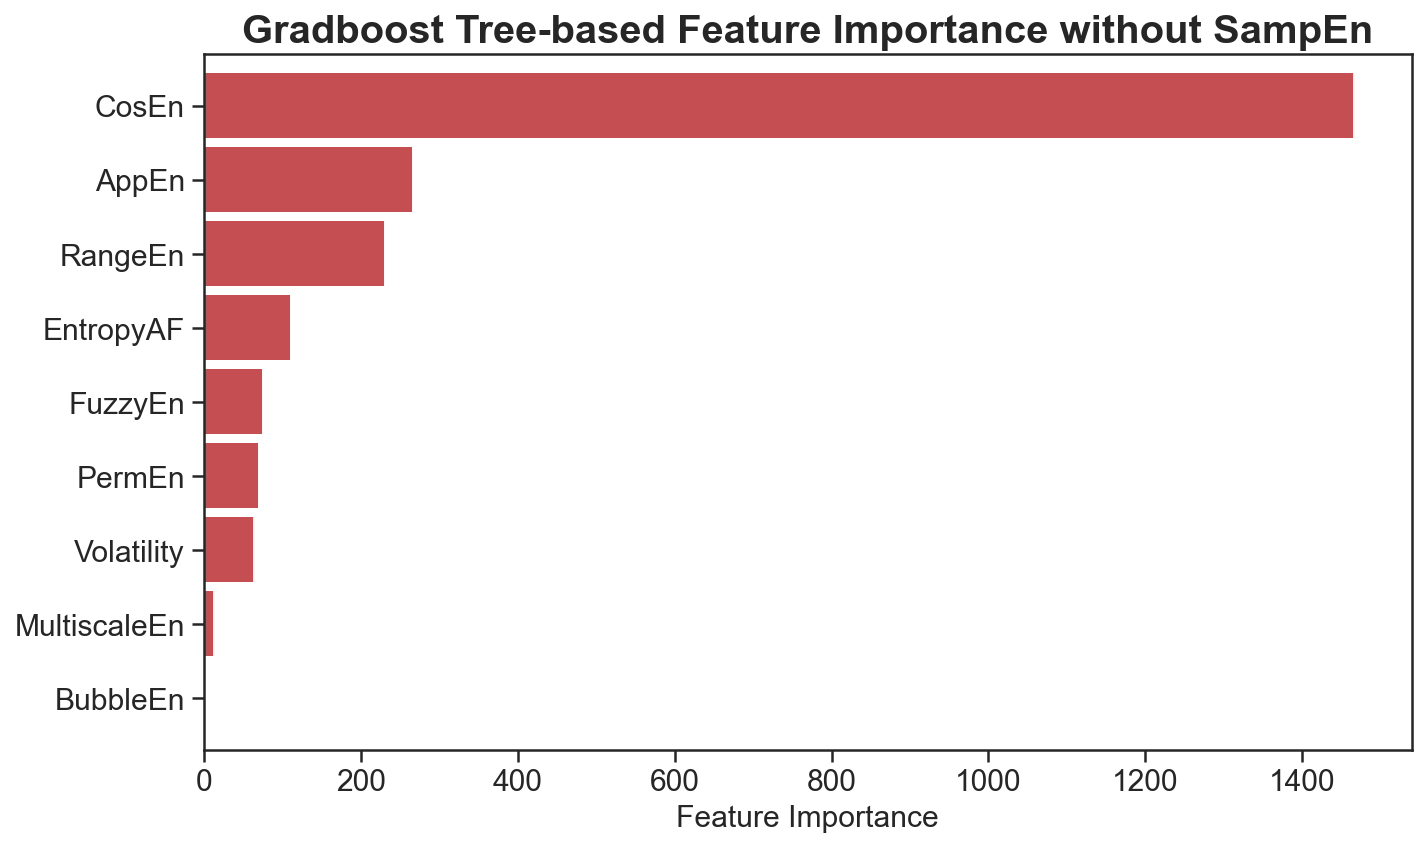

In [36]:
import matplotlib as mpl
df61 = average_importance.sort_values(by='Importance', axis=0, ascending=True)

mpl.rcParams['font.family'] = 'Arial'

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot
df61.plot(kind='barh', color='r', ax=ax, legend=False,width=0.9)

# Set axes labels and title
ax.set_xlabel("Feature Importance", fontsize=15)
ax.set_title("Gradboost Tree-based Feature Importance without SampEn", fontsize=20, weight='bold')

# Make the axes labels bigger
ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()


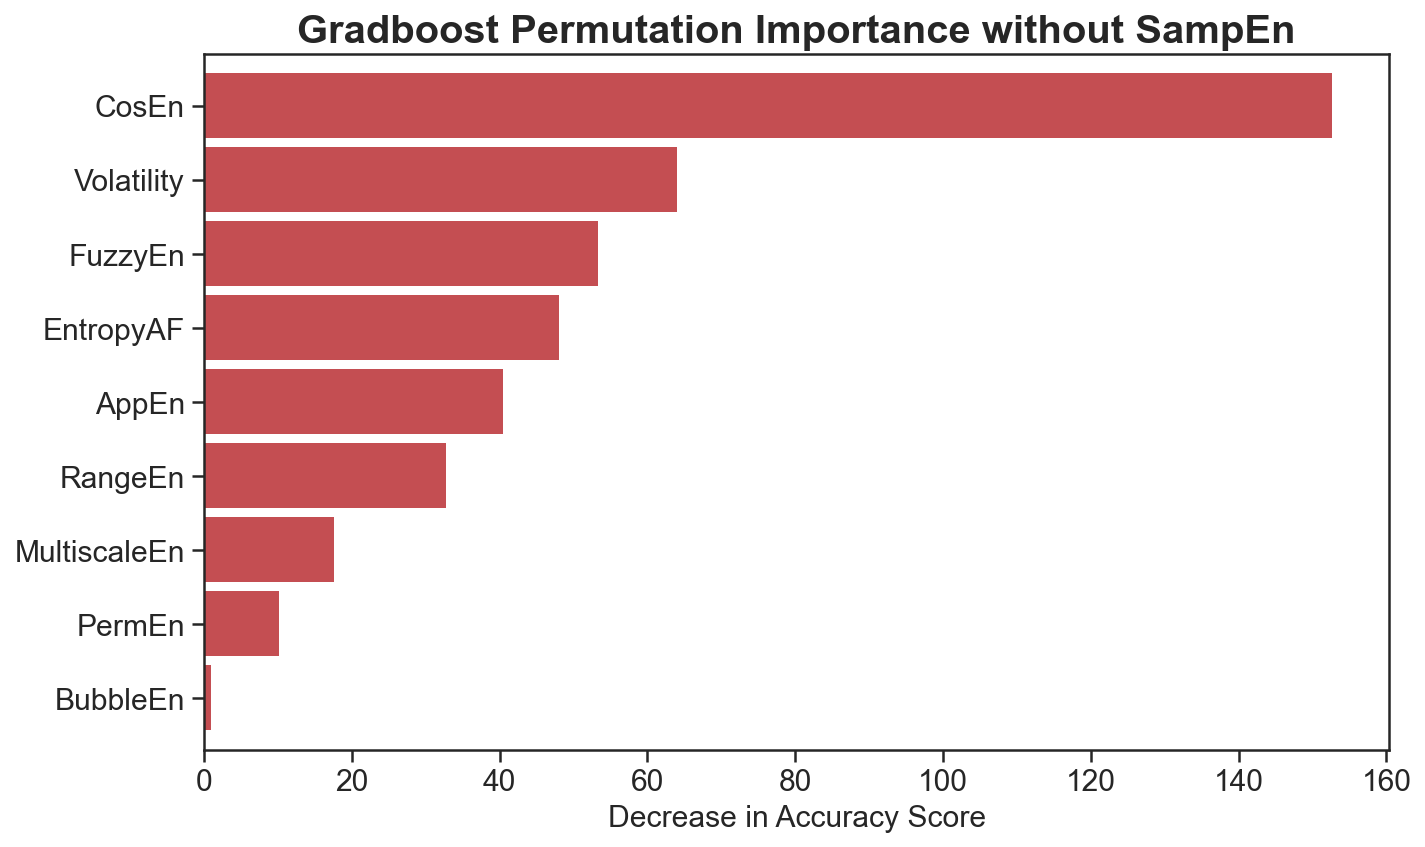

In [37]:
import matplotlib as mpl

perm_imp_df = pd.DataFrame([perm_imp_dict])

perm_imp_df_t = perm_imp_df.T
perm_imp_df_t.columns = ["Importance"]
perm_imp_df_t.sort_values(by=['Importance'],ascending=False)


df62 = perm_imp_df_t.sort_values(by='Importance', axis=0, ascending=True)

mpl.rcParams['font.family'] = 'Arial'

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot
df62.plot(kind='barh', color='r', ax=ax, legend=False,width=0.9)

# Set axes labels and title
ax.set_xlabel("Decrease in Accuracy Score", fontsize=15)
ax.set_title("Gradboost Permutation Importance without SampEn", fontsize=20, weight='bold')

# Make the axes labels bigger
ax.tick_params(axis='both', which='major', labelsize=15)

plt.xlim(0)
plt.tight_layout()
plt.show()


# No SampEn or CosEn

In [38]:
crossvalidation = KFold(n_splits=23)
#for df in features_df_list:
df = features_maindf
acc_score = [];
Truth = [];
Output = [];
# n_estimators_list = []
# max_depth_list = []
import statistics
mode_estimators = 499
mode_depth = 8
#confusion_matrix_df = pd.DataFrame(columns=['TN', 'FP', 'FN', 'TP'])

from sklearn.inspection import permutation_importance
x_values = ['AppEn','RangeEn', 'FuzzyEn',
       'EntropyAF', 'PermEn', 'BubbleEn', 'MultiscaleEn', 'Volatility',]
y_values = ['Rhythm']
#for df in features_df_list:

zero_values_list = [0] * len(x_values)

perm_imp_dict = dict(zip(x_values,zero_values_list))

# Initialize dataframe with zeros
average_importance = pd.DataFrame({'Importance':np.zeros(len(x_values))}, 
                                  index = x_values)

counts = pd.DataFrame({'Count':np.zeros(len(x_values))}, 
                                  index = x_values)


for idx, subject in tqdm(enumerate(good_list)):
    
    train_index = ~df['Subject'].str.contains(subject)
    test_index = df['Subject'].str.contains(subject)
    X_train , X_test = df.loc[train_index,x_values], df.loc[test_index,x_values]
    y_train , y_test = df.loc[train_index,y_values].values.ravel(), df.loc[test_index,y_values]

#     temp_model = GradientBoostingClassifier(n_estimators = 500, 
#                                            learning_rate = 0.1, 
#                                            max_depth = 4, 
#                                            random_state = 2)    
#     param_distributions = {'n_estimators': randint(475,526), 'max_depth': randint(7,9)}

#     search = RandomizedSearchCV(estimator=temp_model, param_distributions=param_distributions, random_state=0)
#     search.fit(X_train, y_train)

#     n_estimators_list.append(search.best_params_['n_estimators'])
#     max_depth_list.append(search.best_params_['max_depth'])    

    model =  GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state = 2)
    model.fit(X_train,y_train)

    pred_values = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]
     
    acc = accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    #confusion_matrix_df.loc[idx] = confusion_matrix(Truth, Output).ravel()
    Truth.extend(y_test.values.reshape(y_test.shape[0])); ## it is a list
    Output.extend(pred_values); ## it is a list 
    
    
    temp_importance = pd.DataFrame({'Importance':model.feature_importances_*100}, 
                          index = X_train.columns)
    for feature in X_train.columns:
        average_importance.loc[feature, 'Importance'] += temp_importance.loc[feature, 'Importance']
        counts.loc[feature, 'Count'] += 1
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

    for i in range(0,len(x_values)):
        perm_imp_dict[x_values[i]] += result.importances_mean[i]*100

    
    
    
elapsed = timeit.default_timer() - start_time #gives total computation time
print("---Run time is %s seconds ---" % elapsed) #prints computation time
print()

print('Accuracy of each fold: \n {}'.format(acc_score))
print()
try: 
    print('Avg accuracy : \n{}'.format(np.mean(acc_score))); 
except: 
    print('hi')
print()
print('Std of accuracy : \n{}'.format(np.std(acc_score)))
print(acc_score)
print(confusion_matrix(Truth, Output))
print(classification_report(Truth, Output))
# temp_list = []
# temp_idx = []
# n_estimators_best = []
# max_depth_best = []
# for acc in acc_score:
#     if acc >= 0.95:
#         temp_list.append(acc)
#         temp_idx.append(acc_score.index(acc))
# for idx in temp_idx:
#     n_estimators_best.append(n_estimators_list[idx])
#     max_depth_best.append(max_depth_list[idx])


23it [04:17, 11.19s/it]

---Run time is 860.9456547000009 seconds ---

Accuracy of each fold: 
 [0.9153318077803204, 0.9622718052738337, 0.9918136020151134, 0.8171462829736211, 0.9869383490073145, 0.9622718052738337, 0.7454460532461467, 0.9959155888359428, 0.9322289156626506, 0.9735391400220507, 0.9777676950998185, 0.9856424982053122, 0.7873015873015873, 0.9751592356687898, 0.7960033305578684, 0.9734160389898094, 0.9924605894448252, 0.9976918638199653, 0.9230769230769231, 0.9851566794942276, 0.9927288280581694, 0.9880728185812931, 0.9902748414376321]

Avg accuracy : 
0.9412024469490021

Std of accuracy : 
0.07507979277536263
[0.9153318077803204, 0.9622718052738337, 0.9918136020151134, 0.8171462829736211, 0.9869383490073145, 0.9622718052738337, 0.7454460532461467, 0.9959155888359428, 0.9322289156626506, 0.9735391400220507, 0.9777676950998185, 0.9856424982053122, 0.7873015873015873, 0.9751592356687898, 0.7960033305578684, 0.9734160389898094, 0.9924605894448252, 0.9976918638199653, 0.9230769230769231, 0.985156679

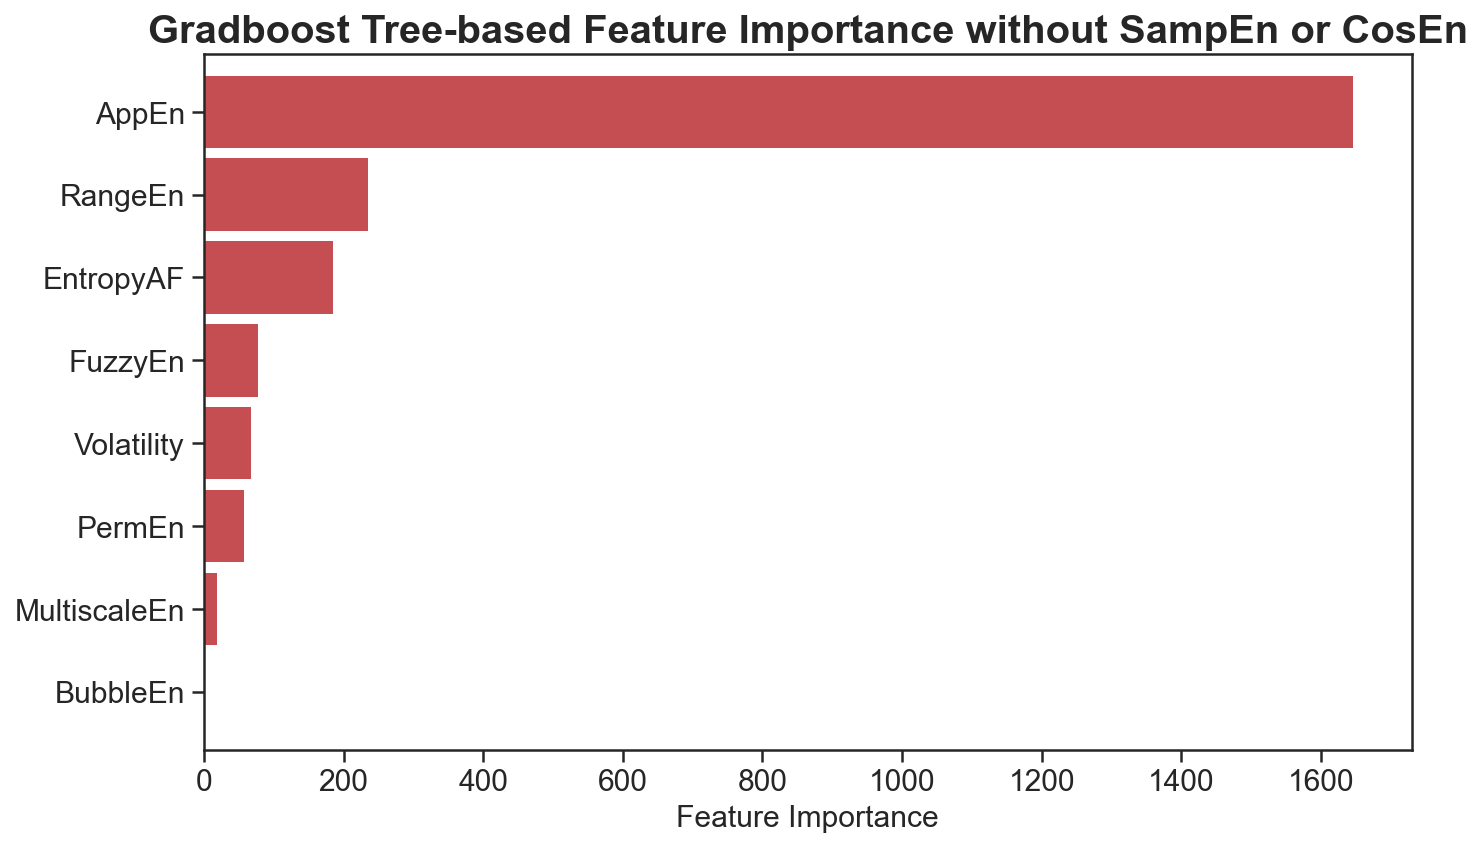

In [39]:
import matplotlib as mpl
df61 = average_importance.sort_values(by='Importance', axis=0, ascending=True)

mpl.rcParams['font.family'] = 'Arial'

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot
df61.plot(kind='barh', color='r', ax=ax, legend=False,width=0.9)

# Set axes labels and title
ax.set_xlabel("Feature Importance", fontsize=15)
ax.set_title("Gradboost Tree-based Feature Importance without SampEn or CosEn", fontsize=20, weight='bold')

# Make the axes labels bigger
ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()


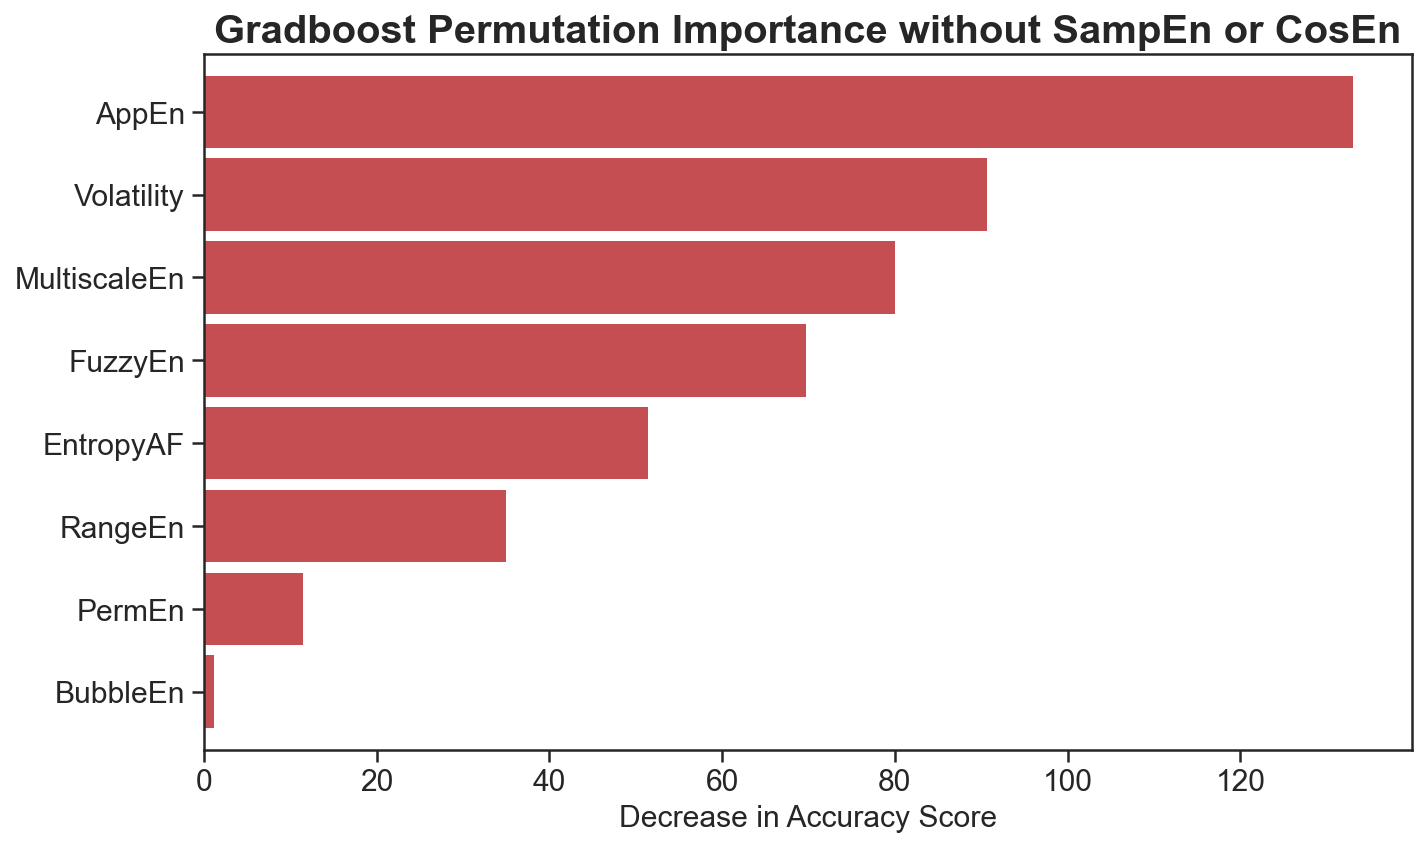

In [40]:
import matplotlib as mpl

perm_imp_df = pd.DataFrame([perm_imp_dict])

perm_imp_df_t = perm_imp_df.T
perm_imp_df_t.columns = ["Importance"]
perm_imp_df_t.sort_values(by=['Importance'],ascending=False)


df62 = perm_imp_df_t.sort_values(by='Importance', axis=0, ascending=True)

mpl.rcParams['font.family'] = 'Arial'

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot
df62.plot(kind='barh', color='r', ax=ax, legend=False,width=0.9)

# Set axes labels and title
ax.set_xlabel("Decrease in Accuracy Score", fontsize=15)
ax.set_title("Gradboost Permutation Importance without SampEn or CosEn", fontsize=20, weight='bold')

# Make the axes labels bigger
ax.tick_params(axis='both', which='major', labelsize=15)

plt.xlim(0)
plt.tight_layout()
plt.show()
